<a href="https://colab.research.google.com/github/gvincenzi/colab/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [54]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [12]:
class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau',
'Sandale', 'Chemise', 'Baskets', 'Sac', 'Bottines']

assert len(class_names)==(max(train_labels)+1)

Bottines


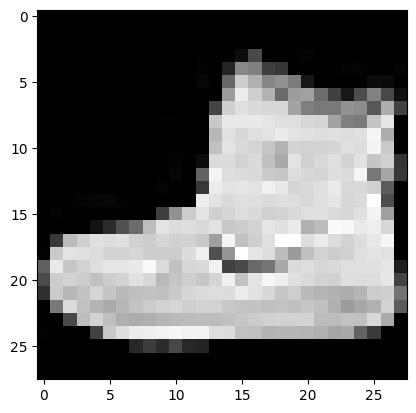

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.gray()
plt.grid(False)

print(class_names[train_labels[0]])

In [64]:
def plot_image(i,images,label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images[i])
  plt.xlabel(class_names[label])

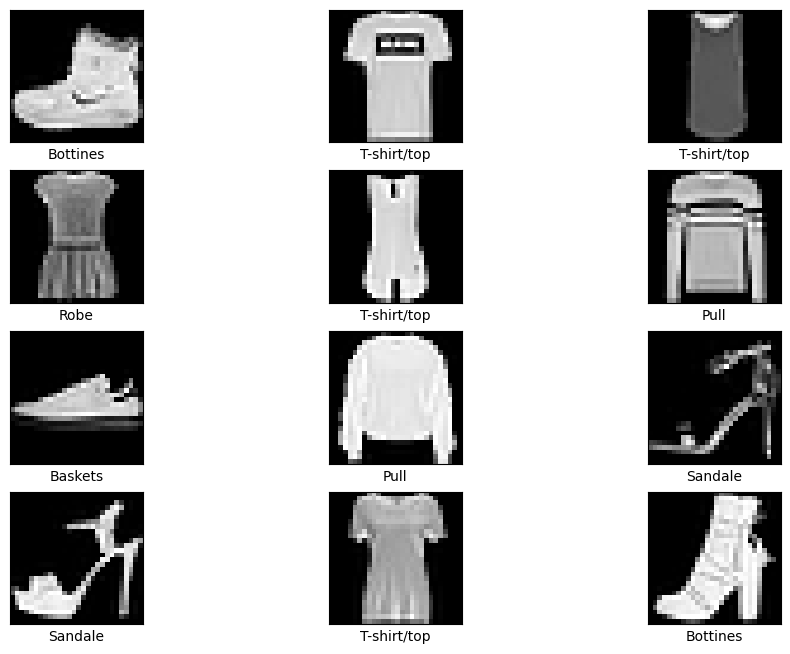

In [65]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,train_images,train_labels[i])

In [55]:
np.max(train_images)
np.max(test_images)
train_images, test_images = train_images / 255.0, test_images / 255.0

np.max(train_images)
np.max(test_images)

1.0

In [79]:
def plot_image_with_prediction(i,images,label,predicted_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images[i])
  if predicted_label == label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[label]),
                                color=color)

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7828 - loss: 0.6266
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8598 - loss: 0.3899
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8754 - loss: 0.3417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8831 - loss: 0.3167
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8906 - loss: 0.2972
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8910 - loss: 0.2872
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8994 - loss: 0.2685
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9045 - loss: 0.2580
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9088 - loss: 0.2447
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9109 - loss: 0.2389


In [60]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8741 - loss: 0.3596


[0.3630138039588928, 0.873199999332428]

In [62]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


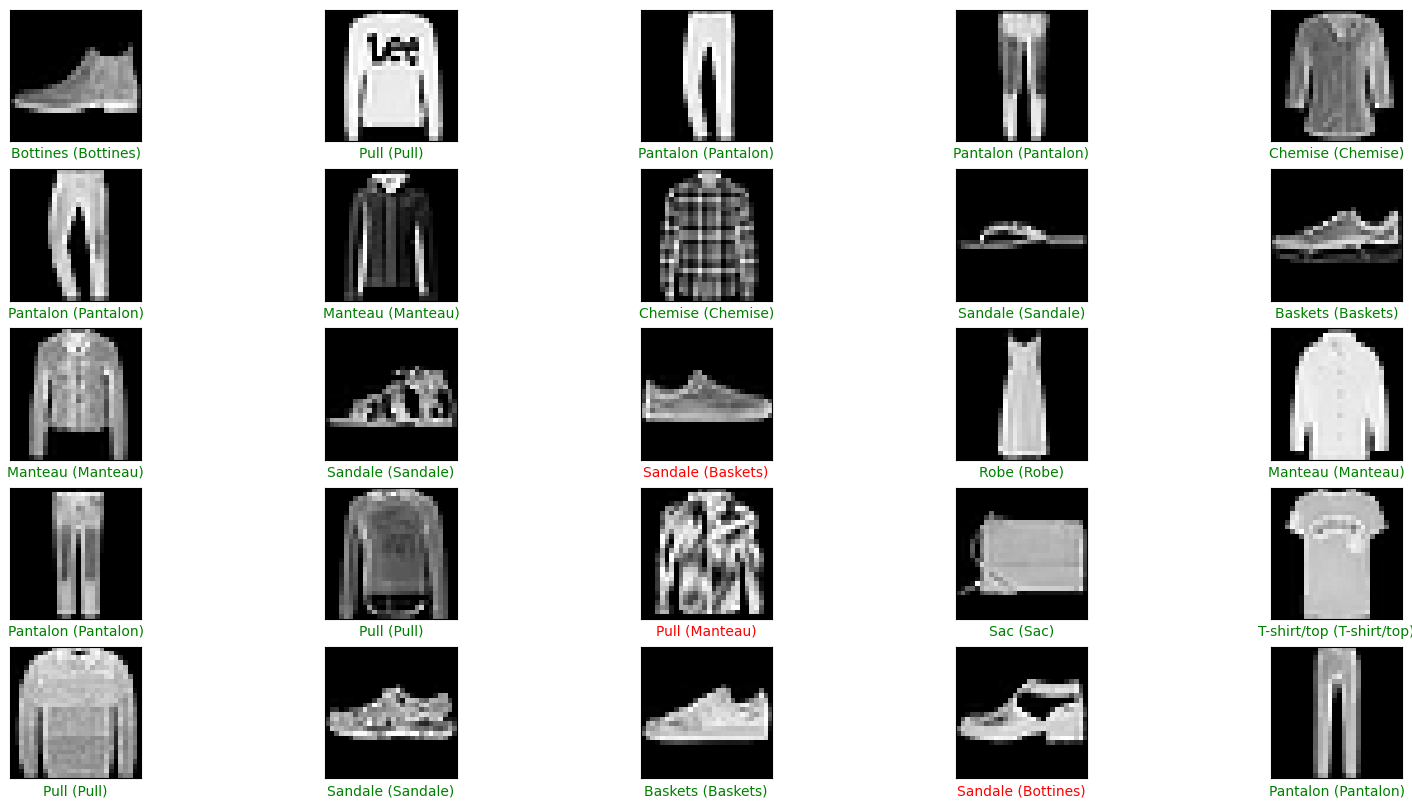

In [81]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_with_prediction(i,test_images,test_labels[i],np.argmax(predictions[i]))